In [21]:
import pandas as pd
import numpy as np

# visualizing
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 8))
plt.rc('font', size=12)

# turn off warnings
import warnings
warnings.filterwarnings("ignore")

# preparing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# modeling and evaluating
from sklearn.tree import DecisionTreeClassifier

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

## Write SQL

### How would you write a query to return the total sales for Texas?

- Type out your query in the Zoom chat.

___

Table Name: **Orders**

|Field|Type|
 |---|---|
| Order ID  |    INT| 
| Order Date  |   DATE|
| Ship Date |     DATE|
| Customer Name | VARCHAR |
| State   |       VARCHAR|
 |Sales   |       DECIMAL |
| Quantity  |    INT |
| Profit     |    DECIMAL |

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

In [5]:
df = pd.read_csv('superstore_for_storytelling_project.csv')
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,11/9/2013,11/12/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2013-152156,11/9/2013,11/12/2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [8]:
df = df[['Order ID', 'Order Date', 'Ship Date', 'Customer Name', 'State', 'Sales', 'Quantity', 'Profit']]
df.head(2)

,Order ID,Order Date,Ship Date,Customer Name,State,Sales,Quantity,Profit
0,CA-2013-152156,11/9/2013,11/12/2013,Claire Gute,Kentucky,261.96,2,41.9136
1,CA-2013-152156,11/9/2013,11/12/2013,Claire Gute,Kentucky,731.94,3,219.5820


## Write Pandas

### How would you find the state with the highest sales using pandas?

- Tell me what code to type, and we'll run it together.

___

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Customer Name  9994 non-null   object 
 4   State          9994 non-null   object 
 5   Sales          9994 non-null   float64
 6   Quantity       9994 non-null   int64  
 7   Profit         9994 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 624.8+ KB


<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

## Project Code

### Read and Talk Through the Following Code.

- I'd like to have you tell me what's going on with the cells of code below.

___

In [2]:
url = 'https://raw.githubusercontent.com/faithkane3/faithkane3.github.io/master/titanic_df.csv'

titanic_df = pd.read_csv(url, index_col=0)
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Customer Name  9994 non-null   object 
 4   State          9994 non-null   object 
 5   Sales          9994 non-null   float64
 6   Quantity       9994 non-null   int64  
 7   Profit         9994 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 624.8+ KB


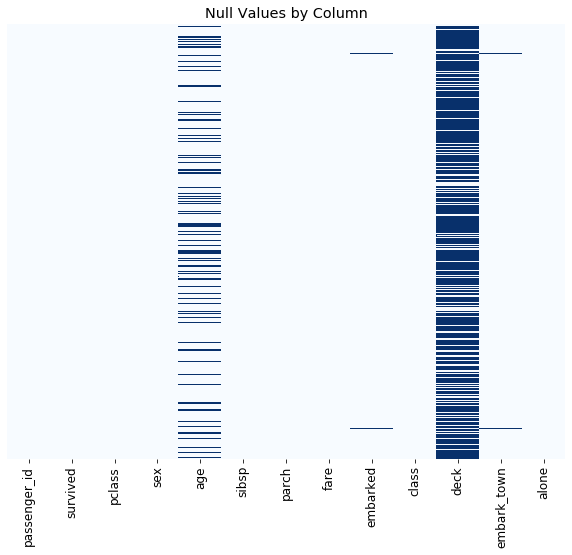

In [16]:
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap='Blues')

plt.title('Null Values by Column')
plt.show()

In [17]:
titanic_df.isna().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
deck            688
embark_town       2
alone             0
dtype: int64

In [18]:
titanic_df['is_female'] = titanic_df.sex.map({'female': 1, 'male': 0})

titanic_df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone,is_female
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0,1
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1,1


In [19]:
titanic_df = titanic_df.drop(columns=['deck', 'passenger_id', 'embarked'])
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   class        891 non-null    object 
 8   embark_town  889 non-null    object 
 9   alone        891 non-null    int64  
 10  is_female    891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 83.5+ KB


In [20]:
train_validate, test = train_test_split(titanic_df, test_size=.2, 
                                        random_state=123, 
                                        stratify=titanic_df.survived)

train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.survived)

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (498, 11)
validate -> (214, 11)
test -> (179, 11)


In [25]:
train.embark_town.value_counts(dropna=False)

Southampton    354
Cherbourg      102
Queenstown      41
NaN              1
Name: embark_town, dtype: int64

In [26]:
imputer = SimpleImputer(strategy='most_frequent')

In [27]:
imputer = imputer.fit(train[['embark_town']])

train[['embark_town']] = imputer.transform(train[['embark_town']])

validate[['embark_town']] = imputer.transform(validate[['embark_town']])

test[['embark_town']] = imputer.transform(test[['embark_town']])

In [30]:
age_imputer = SimpleImputer(strategy='mean')

In [31]:
age_imputer = age_imputer.fit(train[['age']])

train[['age']] = age_imputer.transform(train[['age']])

validate[['age']] = age_imputer.transform(validate[['age']])

test[['age']] = age_imputer.transform(test[['age']])

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     498 non-null    int64  
 1   pclass       498 non-null    int64  
 2   sex          498 non-null    object 
 3   age          498 non-null    float64
 4   sibsp        498 non-null    int64  
 5   parch        498 non-null    int64  
 6   fare         498 non-null    float64
 7   class        498 non-null    object 
 8   embark_town  498 non-null    object 
 9   alone        498 non-null    int64  
 10  is_female    498 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.7+ KB


___

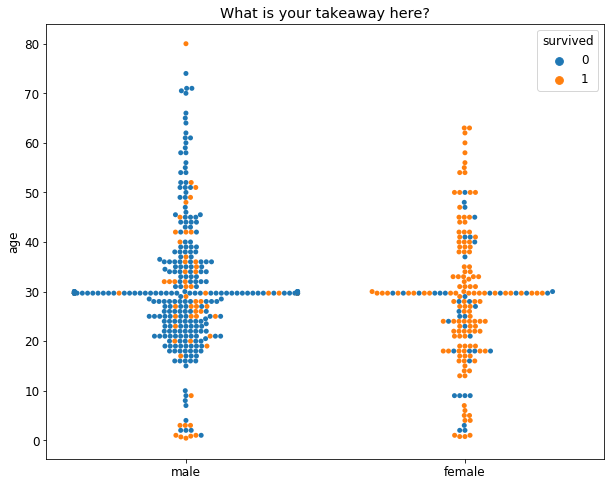

In [34]:
sns.swarmplot(x='sex', y='age', data=train , hue='survived'  )

plt.title('What is your takeaway here?')
plt.xlabel('')
plt.show()

___

In [35]:
# Why would I look at the frequency of occurance of the target values first?

train.survived.value_counts(normalize=True)

0    0.616466
1    0.383534
Name: survived, dtype: float64

In [39]:
X_train = train[['pclass', 'age', 'is_female']]
y_train = train[['survived']]

X_validate = validate[['pclass', 'age', 'is_female']]
y_validate = validate[['survived']]

X_test = test[['pclass', 'age', 'is_female']]
y_test = test[['survived']]

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_validate shape: {X_validate.shape}')
print(f'y_validate shape: {y_validate.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (498, 3)
y_train shape: (498, 1)
X_validate shape: (214, 3)
y_validate shape: (214, 1)
X_test shape: (179, 3)
y_test shape: (179, 1)


In [40]:
clf = DecisionTreeClassifier(random_state=123)

clf.fit(X_train, y_train)

clf.score(X_train, y_train)

0.8975903614457831

In [41]:
clf.score(X_validate, y_validate)

0.7616822429906542

### What might I do at this point?